<center><font size = "10"> Week 13 - Simplification <center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 1
<br>Group member1: Louise Placidet
<br>Group member2: Milo Imbeni
<br>Group member3: Gasser Elbanna

# Ex1. Integrate-And-Fire (IF) Neuron Model

<font size='3'>What is an Integrate-And-Fire (IF) neuron model ? What are the pros and cons of this model - in what situation would this model be useful ? Which aspects of neuronal dynamics does it neglect ? 
    
<font size='3'>Find in the literature a couple of examples that use this type of model and explain why it is (or is not) a good choice for the research question being addressed. [2 pts]

## What is an Integrate-and-Fire (IF) neuron model?

According to "Neuronal Dynamics: From single neurons to networks and models of cognition and beyond", an Integrate-and-Fire neuron model conceives the neural dynamics as a summation process, combined with a mechanism that triggers an action potential above some critical voltage.  This model characterizes the membrane potential $u(t)$ at a time t, which evolves according to a linear differential equation:

$$ C_m \frac{du(t)}{dt} = -g_l(u(t) - u_{rest}) + -g_s(u(t) - E_s) + I_{inj}(t)$$

- with:
    - $C_m$ the membrane capacitance
    - $g_l$ the membrane conductance
    - $u_{rest}$ the resting membrane potential
    - $I_{inj}$ the injected current
   
- With the injected current and the input current from other neurons, it is summated and increases the membrane potential of the neuron.  When this membrane potential reaches a threshold value $u_{thr}$, a spike is produced and $u(t)$ is reset to its reset value $u_{reset}$.

## Pros and Cons of the model - in what situation would this most useful?

- Pros:
    - simple formulation, allows to explicitely calculate the response of the membrane to an injected current (deterministic)
    - fits nicely to experimental results
   
- Cons:neglects many aspects of neuronal dynamics:
    - input, which may arise from presynaptic neurons or from current injection, is integrated linearly, independently of the state of the postsynaptic neuron
        - This is a simplification and reality is somewhat more complicated
            - nonlinear interactions between different presynaptic spikes are neglected in the integrate-and-fire model
            - if several inputs occur on the same dendritic branch within a few milliseconds, the first input will cause local changes of the membrane potential that influence the amplitude of the response to the input spikes that arrive slightly later. This may lead to saturation or, in the case of so-called ‘active’ currents, to an enhancement of the response: and this phenomenon is not taken into account in integrate-and-fire models
     - integrate-and-fire model resets the voltage after each spike to the same value and restarts the integration process, no memory is kept beyond the most recent spike
         - cannot capture adaptation
         - also cannot capture bursting phenomena

## Which aspects of neuronal dynamics does it neglect ?

This neuronal model does not pay close attention to how the membrane potential is generated, but states that there is a critical value and if it is surpassed then a spike/action potential is emitted.  It strongly simplifies the phenomenon, and doesn't take into account more specific phenomena such as the diffusion of ions through the membrane, but models it as a single term.

As mentionned previously, this model is not capable of capturing some aspects of neuronal dynamics: adaptation and bursting.

## Find in the literature a couple of examples that use this type of model and explain why it is (or is not) a good choice for the research question being addressed.

### Paper 1: Extending the integrate-and-fire model to account for metabolic dependencies

In the paper ["Extending the integrate-and-fire model to account for metabolic dependencies"](https://www.biorxiv.org/content/10.1101/2020.11.04.367102v1), the authors focus on the critical role of the brain's metabolic demands for proper neuronal function.  They resort to using integrate-and-fire neuronal models given the high computational resources required for detailed single-neuron models which integrate metabolic constraints.  Indeed, considering single-neuron models makes it computationally difficult to explore the dynamics of extended neural networks imposed by such constraints.  However, this leaky integrate-and-fire neuronal model is modified so that it becomes energy dependent, and thus accounts for the effects of the metabolic constraints on the single-neuron behavior.  This simple model is capable of describing the relationship between the average firing rate and the ATP cost, and also of replicating a neuron's behavior under a clinical setting such as amyotrophic lateral sclerosis.  As a result, this paper highlights that such a model allows to render the problem computationally efficient, and thus can be used to study the dynamics of larger neural networks.

### Paper 2: Reconstructing stimuli from the spike times of leaky integrate and fire neurons

This paper, [Reconstructing stimuli from the spike times of leaky integrate and fire neurons
](https://www.frontiersin.org/articles/10.3389/fnins.2011.00001/full), seeks to reconstruct the stimuli from the spike trains of neurons.  Indeed, this reconstruction consists in an important approach to understand the neural code.  The authors are trying to determine how much infomration about the continuously varying stimulus can be extracted from the time-points at which the spikes were observed.  To deduce this, they used spike trains genrated by leaky integrate and fire neurons, and introduced noise by allowing variations of the threshold every time a spike is released.  They then manage to introduce an efficient algorithm which greatly reduces the bias and leads to better decoding performance in the stochastic case.  Once more, integrate-and-fire neuronal model enables simple and efficient decoding.


### Paper 3: A Generalized Linear Integrate-and-Fire Neural Model Produces Diverse Spiking Behaviors

The leaky integrate-and-fire model for neurons is often used because it manages to capture fundamental properties of neurons (integration, spikes), and it is easily implemented and efficient in stimulations. However, ["A Generalized Linear Integrate-and-Fire Neural Model Produces Diverse Spiking Behaviors"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2954058/) highlights one of its limiations, that is unable to reproduce some biological properties of neurons.  As a result, they mention that several generalizations have been made, introducing new differential equations along with update rules, in order to increase the complexity of the model.  Nonetheless, this increased complexity comes with a computational cost.  The objective of this paper is to introduce a generalization of the leaky integrate-and-fire model which produces a range of spiking behavior, while still being analytically solvable between firings.  The model's rich behavior comes from it's new introduced update rules,

### Paper 4: Integrate-and-Fire Neurons Driven by Correlated Stochastic Input
In ["Integrate-and-Fire Neurons Driven by Correlated Stochastic Input"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2948213/), the authors use integrate-and-fire model neurons driven by a correlated binary variable that represetnts the total input current, in order to study the effect of correlations amonb synaptic inputs.  These models then able to identify the role that a temporal correlation can play in determining the variability as well as the intensity of neuronal spike trains.

# Ex2. Point Neuron: excitatory and inhibitory stimulation

<font size='3'>Create one artifical simplified IF point neuron that responds to excitatory and inhibitory simulations, similar to one in the tutorials. 
Run the following tests and explain the role of each parameter and the effect of its modification, plot Vm, I, E, +input, -input and output for each test and describe your obervations [2 pts] :
1. <font size='3'>Vary the membrane time constant to see change in spiking 
2. <font size='3'>Increase and decrease the rise and decay time constants for the inhibitory synapse
3. <font size='3'>Modify the decay time constant for the excitatory synapse

In [1]:
from neuron import h
import matplotlib.pyplot as plt
import math as m

# Load external files & initialize
h.load_file("stdrun.hoc");
soma = h.Section() # dummy section so h._ref_t works

In [2]:
def create_intfire4_cell(taum, taui1, taui2, taue):
    if4 = h.IntFire4()
    if4.taum = taum # membrane time constant
    if4.taui1 = taui1 # inhibitory current time constant 1
    if4.taui2 = taui2 # inhibitory current time constant 2
    if4.taue = taue # excitatory current time constant
    # Stimulators
    s4a = h.NetStim()
    s4a.interval = 5 # inter-spike interval
    s4a.number = 100 # number of spikes
    s4a.start = 5 # periodic

    s4b = h.NetStim()
    s4b.interval = 25 # inter-spike interval
    s4b.number = 10 # number of spikes
    s4b.start = 8 # periodic
    
    # connect stimulators to IF2 cell
    nc4a = h.NetCon(s4a, if4)
    nc4a.weight[0] = 0.5 # weight of each event
    # store input spike times
    nc4a_v = h.Vector()
    nc4a.record(nc4a_v)

    nc4b = h.NetCon(s4b, if4)
    nc4b.weight[0] = -0.5 # weight of each event (negative -> inhibitory)
    # store input spike times
    nc4b_v = h.Vector()
    nc4b.record(nc4b_v)
    
    # store output spike (event) times
    ev4 = h.NetCon(if4, None)
    ev4_v = h.Vector()
    ev4.record(ev4_v)
    
    # record time
    time_v = h.Vector()
    time_v.record(h._ref_t)
    
    # initialize
    h.stdinit()
    h.finitialize(-65)

    # record M, E and I functions
    vm4_v = h.Vector()
    im4_v = h.Vector()
    em4_v = h.Vector()
    vm4_v.append(if4.M())
    im4_v.append(if4.I())
    em4_v.append(if4.E())

    tstop = 200 # final time
    nstep = m.ceil(tstop / h.dt) # number of time steps
    for i in range(0,nstep):
        h.fadvance() # advance time step
        vm4_v.append(if4.M()) # record M function
        im4_v.append(if4.I()) # record I function
        em4_v.append(if4.E()) # record E function
    
    
    # plot membrane voltage and current
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(time_v,vm4_v,label='Vm')
    ax.plot(time_v,im4_v,label='I')
    ax.plot(time_v,em4_v,label='E')
    ax.vlines(nc4a_v, ymin=-0.4, ymax=-0.1, color='red', label='+input')
    ax.vlines(nc4b_v, ymin=-0.4, ymax=-0.1, color='blue', label='-input')
    if len(ev4_v) > 0:
        ax.vlines(ev4_v, ymin=-0.9, ymax=-0.6, color='black', label='output')
    fig.legend()

## 1. Vary the membrane time constant to see change in spiking 

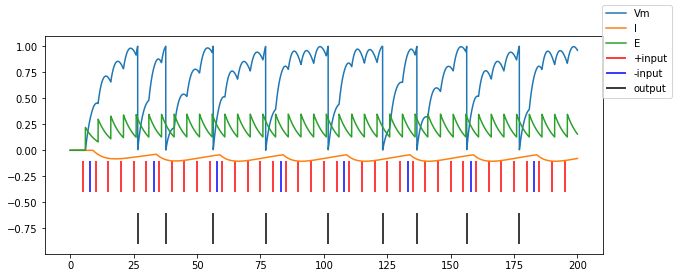

In [3]:
create_intfire4_cell(8,8,10,5)

### By decreasing the membrane time constant

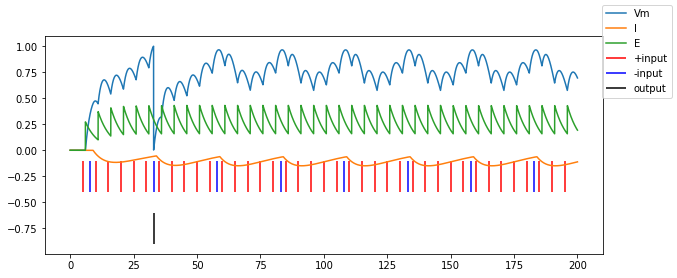

In [7]:
taum = 5
create_intfire4_cell(taum,8,10,5)

### By increasing the membrane time constant

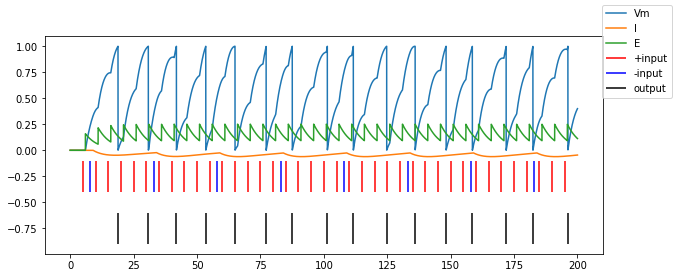

In [15]:
taum = 20
create_intfire4_cell(taum,8,10,5)

### Scenario 1: Vary the membrane time constant to see change in spiking

When the membrane time constant decreases (it was first decreased to 5), the membrane potential has the time to increase and then decrease before the following excitatory input.  Therefore the progressive increase of the membrane potential is considerably slower, and reaches the threshold after a longer period of time.  As a result, the firing rate has decreased.  Moreover, when the membrane time constant is set below 5 (taum = 4), no spiking is observed.

On the other hand, when the membrane time constant increases (it was increased to 15), the changes in membrane potential are slower.  As a result, given that the frequency of the excitatory input remains the same, the membrane potential reaches the firing threshold more quickly: several inputs are given during the rising phases.  Therefore, this leads to a higher firing rate.  Moreover, the dynamics of such parameters lead the membrane potential to charge up regularly, and lead to a periodic firing.

## 2. Increase and decrease the rise and decay time constants for the inhibitory synapse

### By Increasing and Decreasing Rise time constant for the inhibitory synapse

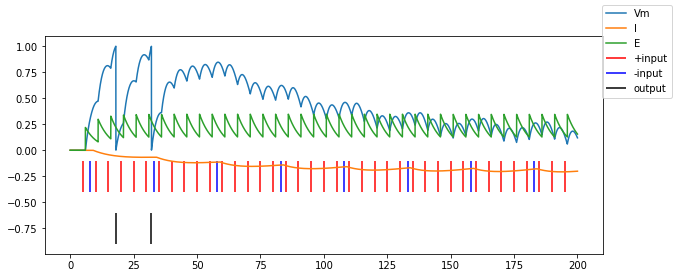

In [12]:
taui1 = 50
create_intfire4_cell(8,taui1,10,5)

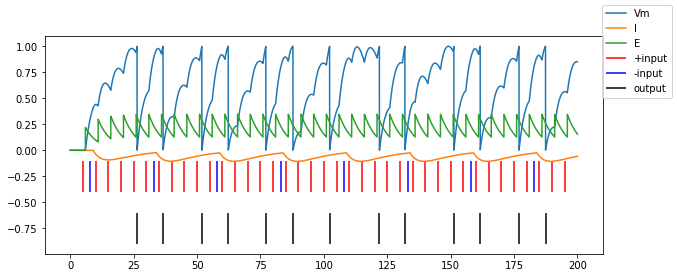

In [10]:
taui1 = 4
create_intfire4_cell(8,taui1,10,5)

### By Increasing and Decreasing Decay time constant

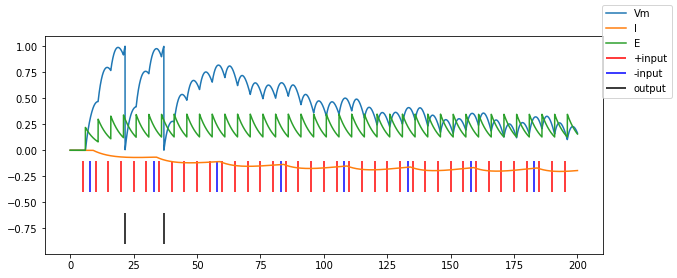

In [14]:
taui2 = 50
create_intfire4_cell(8,8,taui2,5)

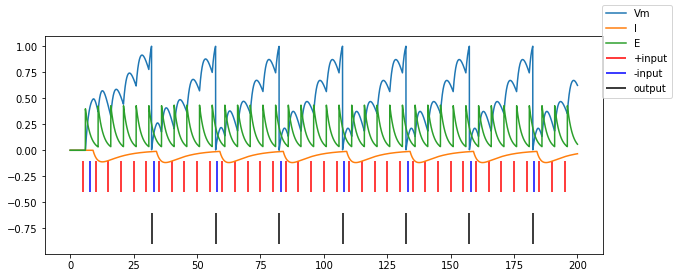

In [17]:
taui2 = 2
create_intfire4_cell(8,8,taui2,5)

### Scenario 2: Increase and decrease the rise and decay time constants for the inhibitory synapse

When increasing the rise time constant for the inhibitory synapse, the inhibitory voltage takes longer to rise (become more hyperpolarized).  As a result, before the inhibitory potential reaching the end of its rising phase, it receives another inhibitory input (blue spike).  Therefore, the inhibitory potential does not have the time to depolarize and becomes progressively more negative.  The consequence of this is that the membrane potential is lower and does not reach the threshold as fast, leading to a decrease of the firing rate.  Indeed, in the case observed, the neuron fires twice before having a membrane potential which remains considerably below the threshold.

On the other hand, when decreasing the rising time constant for the inhibitory synpase, the inhibitory voltage finishes to rise faster and then the decay phase begins sooner.  As a result, when a blue spike (inhibitory spike) arrives, the inhibitory potential has reached its resting value and the inhibition has a smaller effect on the membrane potential.  Indeed, this can be noted in the membrane potential which reaches the threshold faster, leading to a higher firing rate.  Moreover in this particular case, we note a non-periodic firing, due to the irregular charging of the membrane potential.

When we increase the decay time cosntant for the inhibitory synapse, the effect noted is similar to that of the increased rising time constant.  Indeed, the inhibitory potential depolarizes much slower than before, and remains more negative.  As a result, the membrane potential of the neuron is more inhibited and fires less.  This can be noted with a decreased firing rate.  The membrane potential initially reaches the threshold twice and thus spikes twice, before being too small to reach the threshold.

On the other hand, when decreasing the decay time constant for the inhibitory synapse, the inhibitory potential quickly rises back to zero, before the following inhibitory input (blue spike).  This leads to a regular charging of the membrane potential, as seen with the periodic spikes.  Moreover, we can note that the firing becomes periodic but with an initial delay.

## 3. Modify the decay time constant for the excitatory synapse

### By Decreasing Decay time constant

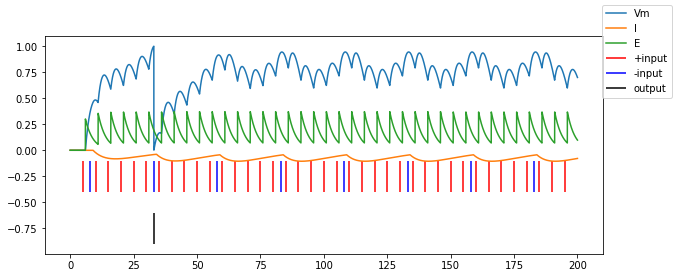

In [21]:
taue = 3
create_intfire4_cell(8,8,10,taue)

### By Increasing Decay time constant

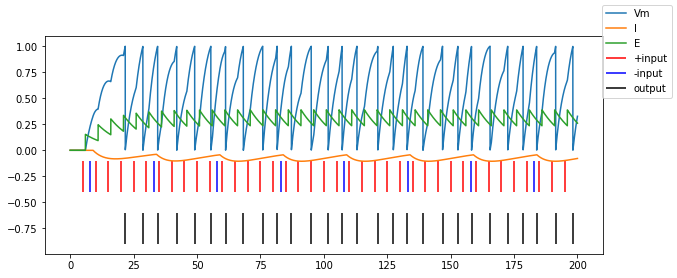

In [23]:
taue = 50
create_intfire4_cell(8,8,10,taue)

### Scenario 3: Modify the decay time constant for the excitatory synapse

When decreasing the decay time for the excitatory synapse, the excitatory potential reaches its resting state much faster.  As a result, the membrane potential is not able reach the threshold, because the excitatory stimulation is too brief.  Indeed, we notice that it reaches the firing threshold once, and then hovers below for the remainder of the stimulation.  This leads to the emission of a single spike.

On the other hand, when increasing the decay time for the excitatory synapse, the excitatory potential does not have the time to decay back to its resting value before another excitatory input (red spike) comes in.  This leads a progressively higher amplitude of the excitatory potential.  As a result, the charging of the membrane potential is considerably faster, and reaches the threshold more quickly.  Indeed, this can be noted with a considerably increased firing rate.

# Ex3. Point Neuron Network Experimentation

<font size='3'>Create a point neuron network with 30 IF neurons with 55% probability that a cell could be excitatory. Assign to your excitatory and inhibitory cell populations different model parameters (taum, taui1, taui2 and taue) of your choice. Make sure to try a few different values that would make the neurons fire nicely. Define random connectivity, stimulation and simulation as it is in tutorial 02. 

<font size='3'>Experiment with the time constants of the inhibitory and excitatory cells to make each population dominate the network in turn. Plot the voltage traces and the raster as your solution and comment on your experimentaiton and observations.  [2 pts]

In [1]:
from neuron import h
import matplotlib.pyplot as plt
import numpy as np

# Load external files & initialize
h.load_file("stdrun.hoc");
soma = h.Section() # dummy section so h._ref_t works

In [2]:
Nneur = 30 # number of neurons in network
pExc = 0.55 # probability of cell being excitatory

In [3]:
taum = 8
taui1 = 8
taui2 = 10
taue = 15

In [13]:
def create_point_neuron_network(Nneur, pExc, taum, taui1, taui2, taue):
    np.random.seed(9)
    rng = np.random.default_rng()

    # create cell population with fixed parameters
    cells = []
    for i in range(0,Nneur):
        if4 = h.IntFire4()
        if4.taum = taum # membrane time constant
        if4.taui1 = taui1 # inhibitory current time constant 1
        if4.taui2 = taui2 # inhibitory current time constant 2
        if4.taue = taue # excitatory current time constant
        typ = 'Exc' if rng.uniform() < pExc else 'Inh' # sample type
        cells.append({ 'GID': i, 'cell': if4, 'type': typ, 'conns': [], 'spikes': h.Vector(), 'V': None, 'I': None, 'E': None })

    NExc = len([x for x in cells if x['type'] == 'Exc'])
    NInh = Nneur - NExc
    print("Have {} Exc cells and {} Inh cells in network".format(NExc,NInh))
    
    import itertools

    # connect cells with random weights (all-to-all but self)
    for src_cell,tgt_cell in itertools.product(cells,cells):
        src = src_cell['cell']
        tgt = tgt_cell['cell']
        if src == tgt:
            dummy = h.NetCon(src, None) # dummy netcon to record events
            dummy.record(src_cell['spikes']) # record spikes
        else:
            w = 0.8 * rng.uniform() # random uniform in [0:0.8)
            w = w if src_cell['type'] == 'Exc' else -w # weight positive (Exc) or negative (Inh)
            nc = h.NetCon(src, tgt) # new netcon between src and tgt
            nc.weight[0] = w # set weight
            nc.delay = rng.integers(5,15) # set delay
            src_cell['conns'].append(nc) # save netcon in source cell

    print("Have {} connections in total: E-E = {}; E-I = {}; I-E = {}; I-I = {}".format(
    Nneur*Nneur-Nneur,NExc*NExc-NExc,NExc*NInh,NExc*NInh,NInh*NInh-NInh))

    # Setup external stimulation (otherwise no activity at all!)
    stim = h.NetStim()
    stim.start = 5
    stim.number = 1000
    stim.interval = 10

    stimcell = None
    for cell in cells:
        if cell['type'] == 'Exc':
            stimcell = cell['cell']
            break

    stim_nc = h.NetCon(stim, stimcell) # connect to first Exc cell
    stim_nc.weight[0] = 0.8
    stimvec = h.Vector()
    stim_nc.record(stimvec)

    # Setup reporting
    tvec = h.Vector()
    tvec.record(h._ref_t)

    for cell in cells:
        cell['V'] = h.Vector()

    # Run simulation (may take a while!)

    # initialize
    h.stdinit()
    h.finitialize(-65)

    # store initial value after init
    for cell in cells:
        cell['V'].append(cell['cell'].M())

    tstop = 200 # final time
    nstep = np.int(np.ceil(tstop / h.dt)) # number of time steps
    for i in range(0,nstep):
        if i%100 == 0:
            print('Step {}'.format(i))
        h.fadvance() # advance time step
        for cell in cells:
            cell['V'].append(cell['cell'].M()) # record M function

    # Collect all spikes
    spikes = []
    for cell in cells:
        spk = [(t,cell['GID']) for t in cell['spikes']]
        spikes += spk
    spikes = np.array(spikes)

    print("Have {} spikes in total".format(len(spikes)))

    # plot voltage traces
    fig, ax = plt.subplots(figsize=(15,4))
    for cell in cells:
        ax.plot(tvec,cell['V'],label='GID {}'.format(cell['GID']))
    fig.legend()
    None

    # plot spike raster
    fig, ax = plt.subplots(figsize=(15,8))
    ax.vlines(stimvec, ymin=-0.75 - 0.5, ymax=-0.25 - 0.5, color='black', label='stim')
    for cell in cells:
        c = 'red' if cell['type'] == 'Exc' else 'blue'
        gid = cell['GID']
        ymin = gid + 0.25 - 0.5
        ymax = gid + 0.75 - 0.5
        if len(cell['spikes']) > 0:
            ax.vlines(cell['spikes'], ymin=ymin, ymax=ymax, color=c, label='GID {}'.format(gid))
    ax.set_xlim((0,tstop))
    ax.set_xlabel('Time (ms)')
    fig.legend()
    None

In [14]:
create_point_neuron_network(Nneur, pExc, taum, taui1, taui2, taue)

Have 17 Exc cells and 13 Inh cells in network
Have 870 connections in total: E-E = 272; E-I = 221; I-E = 221; I-I = 156



KeyboardInterrupt

